In [12]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import json

In [9]:
img_path = os.path.abspath("/Users/jason/Documents/School/Duke/2022-2023/BME493/datasets/converted_00002/train/images/00002__00000.jpg")
meta_path = os.path.abspath("/Users/jason/Documents/School/Duke/2022-2023/BME493/datasets/converted_00002/train/meta/00002__00000.json")

In [13]:
with open(meta_path) as f:
    meta = json.load(f)
    print(meta)

{'device': 'iPhone 6', 'screen_h': 568, 'screen_w': 320, 'face_valid': 1, 'face_x': 38, 'face_y': 230, 'face_w': 344, 'face_h': 344, 'leye_x': 205, 'leye_y': 309, 'leye_w': 103, 'leye_h': 103, 'reye_x': 71, 'reye_y': 319, 'reye_w': 103, 'reye_h': 103, 'dot_xcam': 1.064, 'dot_y_cam': -6.0055, 'dot_x_pix': 160, 'dot_y_pix': 284, 'reye_x1': 124, 'reye_y1': 380, 'reye_x2': 175, 'reye_y2': 371, 'leye_x1': 250, 'leye_y1': 367, 'leye_x2': 302, 'leye_y2': 370}


In [15]:
def makeBoundingBox(x, y, w, h): 
    return [(x, y), (x+w, y), (x+w, y+h), (x, y+h)]

In [16]:
face_bounding_box = makeBoundingBox(meta['face_x'], meta['face_y'], meta['face_w'], meta['face_h'])
leye_bounding_box = makeBoundingBox(meta['leye_x'], meta['leye_y'], meta['leye_w'], meta['leye_h'])
reye_bounding_box = makeBoundingBox(meta['reye_x'], meta['reye_y'], meta['reye_w'], meta['reye_h'])

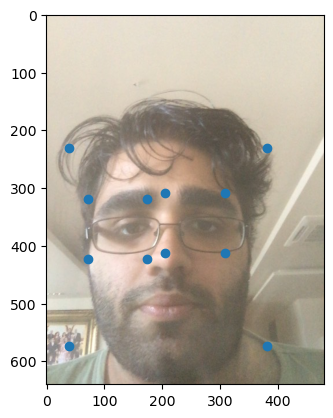

In [19]:
%matplotlib inline

img = mpimg.imread(img_path)
face_x, face_y = zip(*face_bounding_box)
leye_x, leye_y = zip(*leye_bounding_box)
reye_x, reye_y = zip(*reye_bounding_box)
x = face_x + leye_x + reye_x
y = face_y + leye_y + reye_y

plt.imshow(img)
plt.scatter(x, y)

In [21]:
# find proportion of face to eye
proportion = meta['face_h']/meta['leye_h']
proportion

3.3398058252427183

In [ ]:
plt.imshow(img)
x = 